# 머신러닝 예제

## 선형회귀 예제 : 일차함수 관계식 찾기

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
# y = ax + b 형식의 x, y 데이터 생성
# ex) y = x + 1
x = np.array([-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]).reshape(-1, 1)
y= np.array([-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]).reshape(-1, 1)

In [5]:
# 모델학습
lr = LinearRegression() # 선형회귀 학습을 위한 모델 생성
lr.fit(x, y) # 데이터를 통해 선형회귀 모델 학습

LinearRegression()

In [6]:
print(f'기울기 : {lr.coef_[0][0]}, y절편 : {lr.intercept_[0]}')

기울기 : 0.9999999999999999, y절편 : 0.9999999999999999


In [7]:
# 새로운 입력 데이터 x_new에 대한 y를 예측함
x_new = np.array(11).reshape(1,1)  
lr.predict(x_new)

array([[12.]])

## 분류 예제

### 전처리 과정

In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
iris = datasets.load_iris()  # sklearn에서 iris(붓꽃)데이터 불러옴
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
'''
iris 데이터에는 꽃받침(sepal), 꽃잎(petal)에 대한 가로/세로 길이가 저장되어 있다.
목표레이블은 3가지 꽃 품종(Setosa:0, Versicolour:1, Virginica:2)이 존재하며, 데이터를 통해 이를 분류한다.
'''
print(iris['DESCR'])  # 데이터에 대한 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
# iris 데이터를 dataframe 형태로 불러옴
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']

# target 열 추가
df['Target'] = iris['target']
df.head()

,sepal length,sepal width,petal length,petal width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df.info()  # 데이터셋의 기본 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [14]:
df.describe()  # 데이터셋의 평균값, 표준편차, 최소값, 최대값 등 통계값 요약

,sepal length,sepal width,petal length,petal width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
df.isnull().sum()  # 결측값 확인

sepal length    0
sepal width     0
petal length    0
petal width     0
Target          0
dtype: int64

In [16]:
df.drop_duplicates()  # 중복값 제거

,sepal length,sepal width,petal length,petal width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


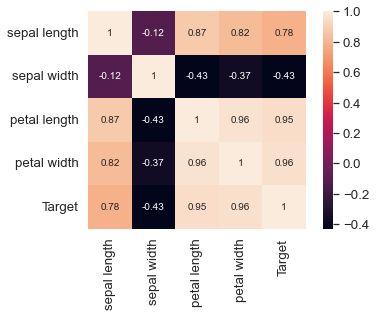

In [17]:
# 각 feature에 대한 상관계수행렬 시각화
sns.set(font_scale=1.2)
sns.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

c:\Users\User\jupyter_project\멘토멘티\venv\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


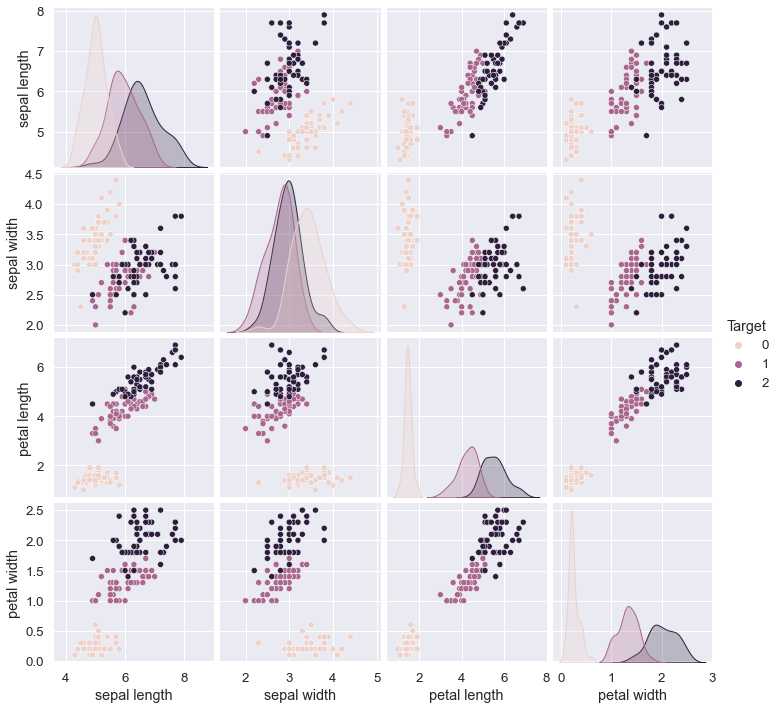

In [18]:
# 각 feature 간 관계를 나타내는 그래프 시각화
sns.pairplot(df, hue='Target', size=2.5, diag_kind='kde')

### 머신러닝 분류 알고리즘

In [19]:
from sklearn.model_selection import train_test_split  # train/test 데이터분할
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.svm import SVC  # SVM
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier  #의사결정나무
from sklearn.metrics import accuracy_score  # 성능평가

#### 학습데이터 생성

In [22]:
x_data = df.loc[:, 'sepal length':'petal width']
y_data = df.loc[:, 'Target']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, shuffle=True, random_state=20)  # 전체 데이터를 7:3 비율로 학습/검증 데이터로 분류함

#### 분류알고리즘(1) - KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=7)  # k = 7
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [24]:
y_knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, y_knn_pred)
print(f'Accuracy : {knn_acc}')

Accuracy : 0.9777777777777777


#### 분류알고리즘(2) - SVM

In [25]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [26]:
y_svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(y_test, y_svc_pred)
print(f'Accuracy : {svc_acc}')

Accuracy : 0.9555555555555556


#### 분류알고리즘(3) - 로지스틱 회귀

In [27]:
lrc = LogisticRegression()
lrc.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_lrc_pred = lrc.predict(x_test)
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print(f'Accuracy : {lrc_acc}')

Accuracy : 0.9333333333333333


#### 분류알고리즘(4) - 의사결정나무

In [29]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=20)  # 최대 깊이 : 3
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=20)

In [30]:
y_dtc_pred = dtc.predict(x_test)
dtc_acc = accuracy_score(y_test, y_dtc_pred)
print(f'Accuracy : {dtc_acc}')

Accuracy : 0.8888888888888888
